In [38]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [39]:
cardio_df = pd.read_csv("tamrin 2.csv")
cardio_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
cardio_df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [48]:
# determining x and y and converting into np.array
x = np.asarray(cardio_df[["age", "sex", "cp", "trtbps", "chol", "fbs", "restecg", "thalachh", "exng", "oldpeak", "slp", "caa", "thall"]])
y = np.asarray(cardio_df["output"])

In [49]:
# normalizing
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)

In [50]:
# train & test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [51]:
# modeling
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train) 

SVC()

In [52]:
y_hat = clf.predict(x_test)

[[29  7]
 [ 1 24]]
Confusion matrix, without normalization
[[29  7]
 [ 1 24]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.86        25
           1       0.97      0.81      0.88        36

    accuracy                           0.87        61
   macro avg       0.87      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61

f1 scoe:  0.8699169682776241
jaccard score:  0.75


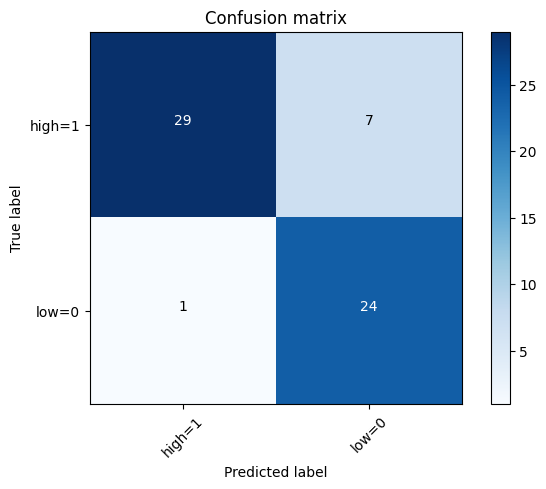

In [54]:
# evaluaation
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_hat, labels=[1,0]))

cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['high=1','low=0'],normalize= False,  title='Confusion matrix')

print (classification_report(y_test, y_hat))

# f1 score
from sklearn.metrics import f1_score
print("f1 scoe: ", f1_score(y_test, y_hat, average='weighted')) 

# jaccard
from sklearn.metrics import jaccard_score
print("jaccard score: ", jaccard_score(y_test, y_hat,pos_label=0))